In [1]:
%matplotlib inline

/Users/natalia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '



# Faces dataset decompositions


This example applies to :ref:`olivetti_faces` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
:ref:`decompositions`) .



In [2]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

Automatically created module for IPython interactive environment


Load faces data


In [3]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/natalia/scikit_learn_data
Dataset consists of 400 faces


In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

List of the different estimators, whether to center and transpose the
problem, and whether the transformer uses the clustering API.


In [5]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]

Plot a sample of the input data


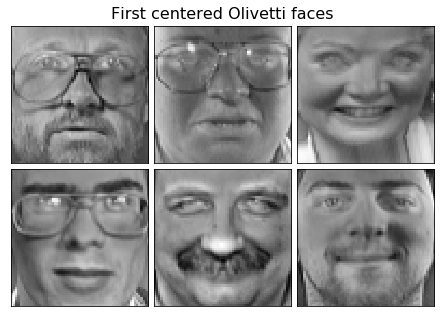

In [6]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Do the estimation and plot it


Extracting the top 6 Eigenfaces - PCA using randomized SVD...


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

done in 1.446s
Extracting the top 6 Non-negative components - NMF...


NMF(alpha=0.0, beta=1, eta=0.1, init='nndsvda', l1_ratio=0.0, max_iter=200,
  n_components=6, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.005, verbose=0)

done in 2.015s
Extracting the top 6 Independent components - FastICA...


/Users/natalia/anaconda/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=6, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

done in 1.177s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...


MiniBatchSparsePCA(alpha=0.8, batch_size=3, callback=None, method='lars',
          n_components=6, n_iter=100, n_jobs=1,
          random_state=<mtrand.RandomState object at 0x1180f9e10>,
          ridge_alpha=0.01, shuffle=True, verbose=False)

done in 4.519s
Extracting the top 6 MiniBatchDictionaryLearning...


MiniBatchDictionaryLearning(alpha=0.1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=15, n_iter=50, n_jobs=1,
              random_state=<mtrand.RandomState object at 0x1180f9e10>,
              shuffle=True, split_sign=False, transform_algorithm='omp',
              transform_alpha=None, transform_n_nonzero_coefs=None,
              verbose=False)

done in 3.549s
Extracting the top 6 Cluster centers - MiniBatchKMeans...


MiniBatchKMeans(batch_size=20, compute_labels=True, init='k-means++',
        init_size=None, max_iter=50, max_no_improvement=10, n_clusters=6,
        n_init=3, random_state=<mtrand.RandomState object at 0x1180f9e10>,
        reassignment_ratio=0.01, tol=0.001, verbose=0)

done in 0.264s
Extracting the top 6 Factor Analysis components - FA...


/Users/natalia/anaconda/lib/python2.7/site-packages/sklearn/decomposition/factor_analysis.py:224: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


FactorAnalysis(copy=True, iterated_power=3, max_iter=2, n_components=6,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

done in 0.227s


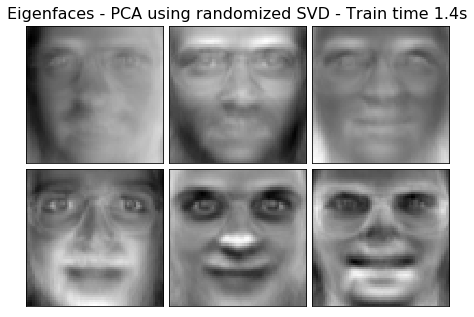

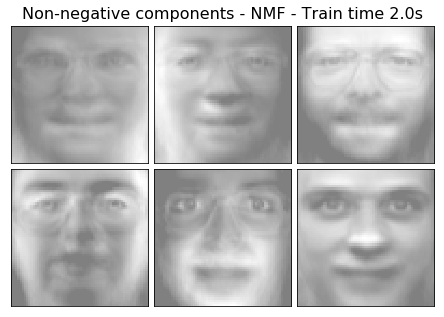

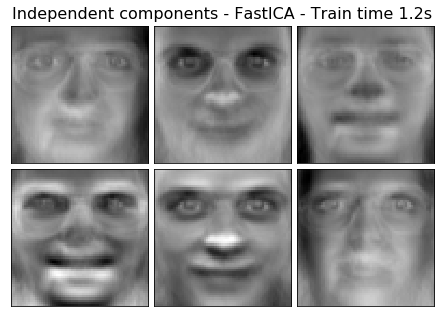

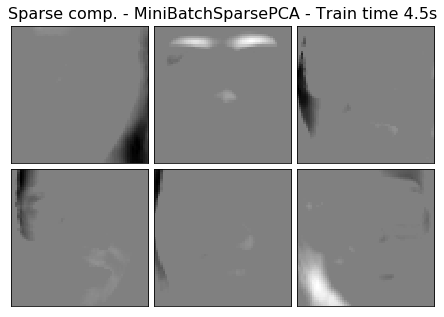

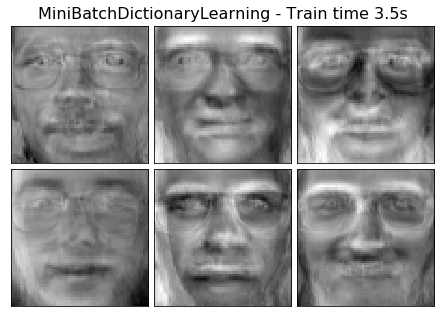

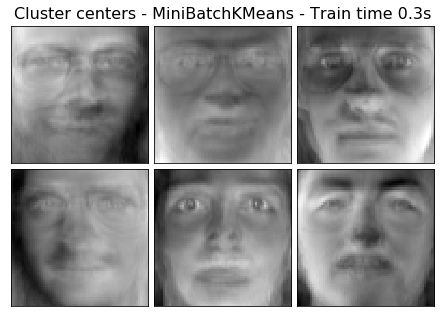

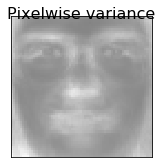

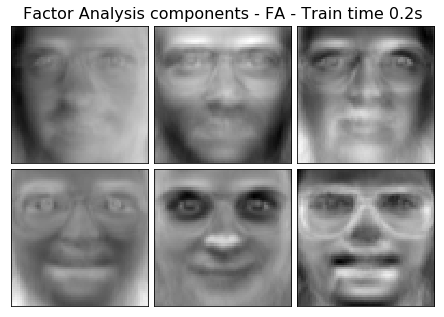

In [7]:
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.shape != ()):
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()